In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

In [6]:

df = pd.read_csv("train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

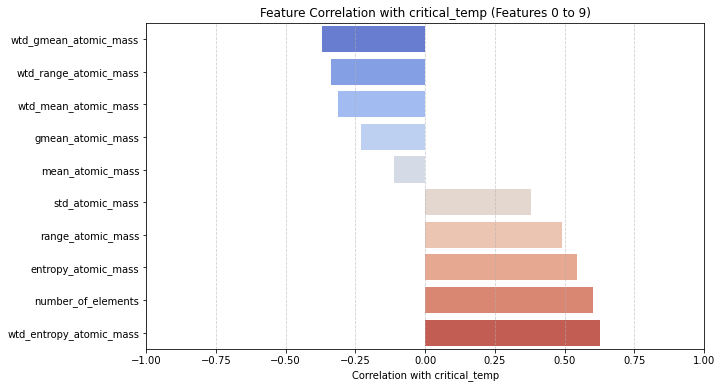

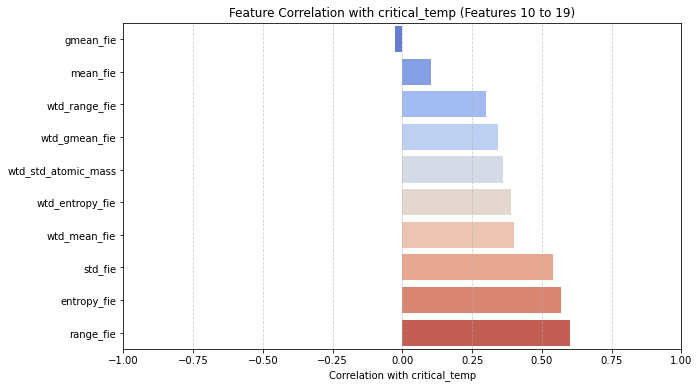

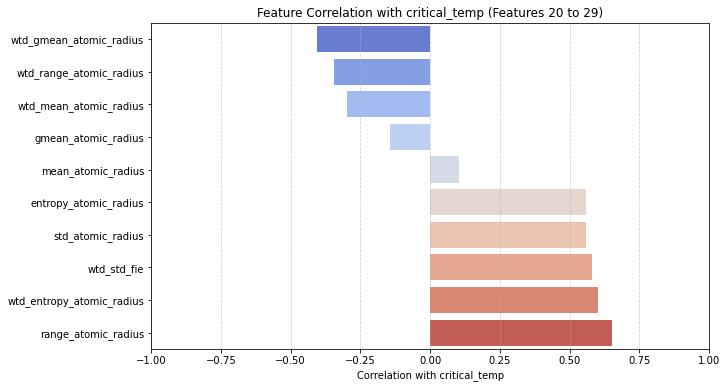

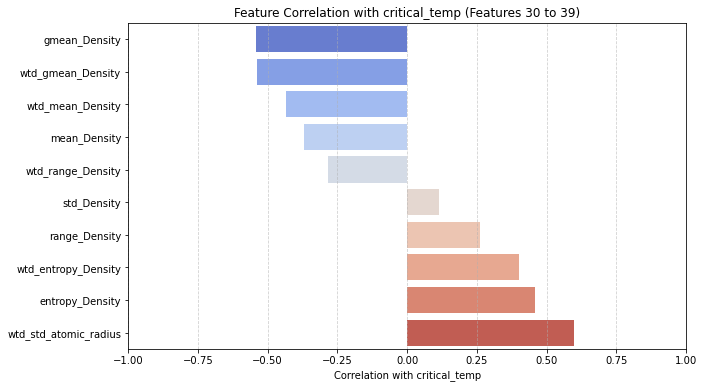

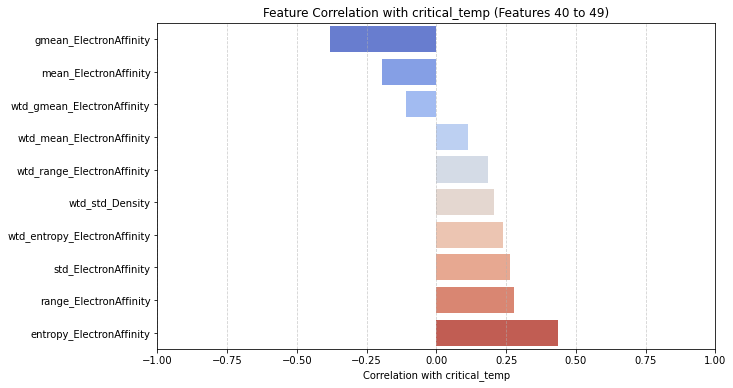

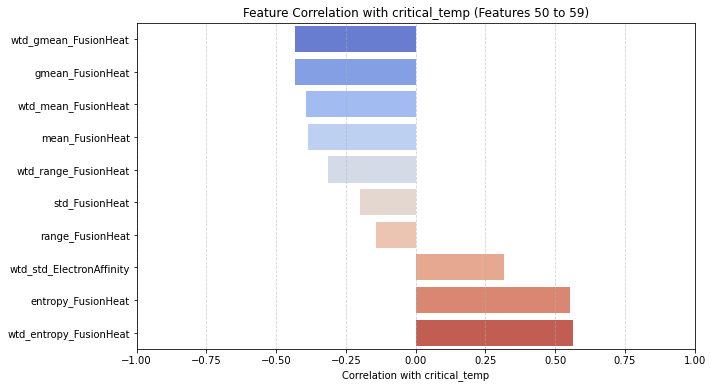

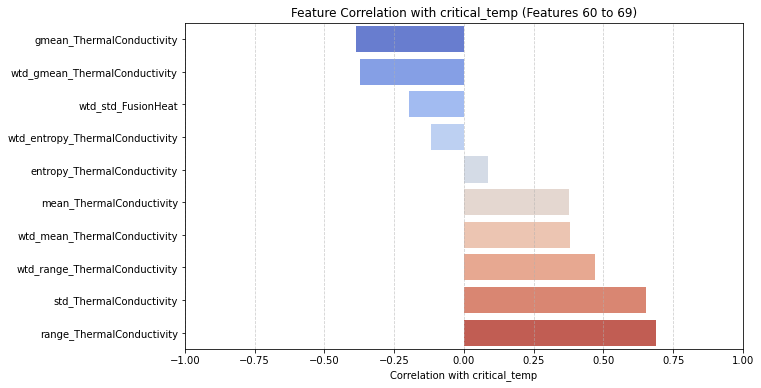

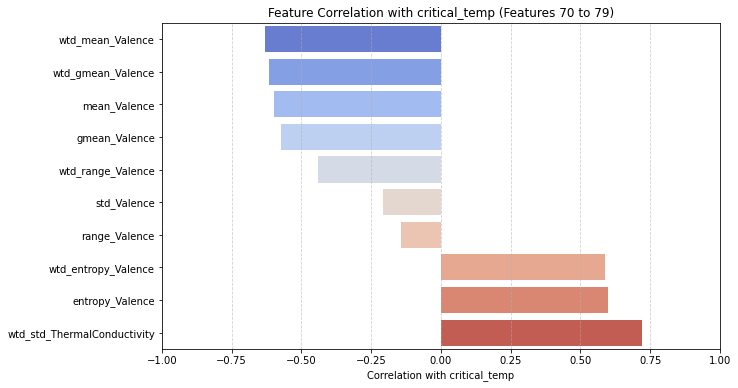

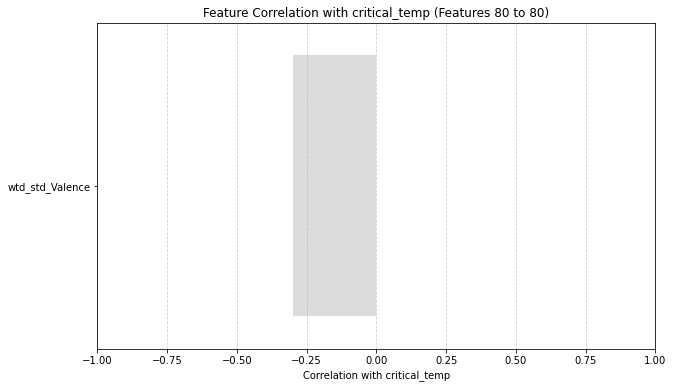

In [24]:
# Compute correlations with the target variable
corr_with_target = df.corr()['critical_temp'].drop('critical_temp')

# Features per plot
features_per_plot = 10
num_features = len(corr_with_target)
num_groups = int(np.ceil(num_features / features_per_plot))

feature_names = corr_with_target.index

for i in range(num_groups):
    start = i * features_per_plot
    end = min(start + features_per_plot, num_features)
    
    subset_features = feature_names[start:end]
    subset_corr = corr_with_target[subset_features].sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=subset_corr.values, y=subset_corr.index, palette='coolwarm')
    plt.xlabel('Correlation with critical_temp')
    plt.title(f'Feature Correlation with critical_temp (Features {start} to {end - 1})')
    plt.xlim(-1, 1)  # correlation range from -1 to 1
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

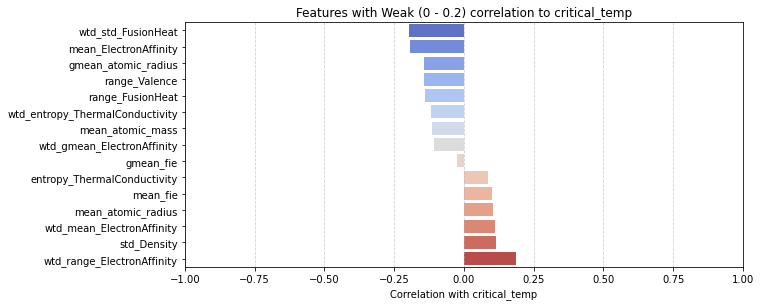

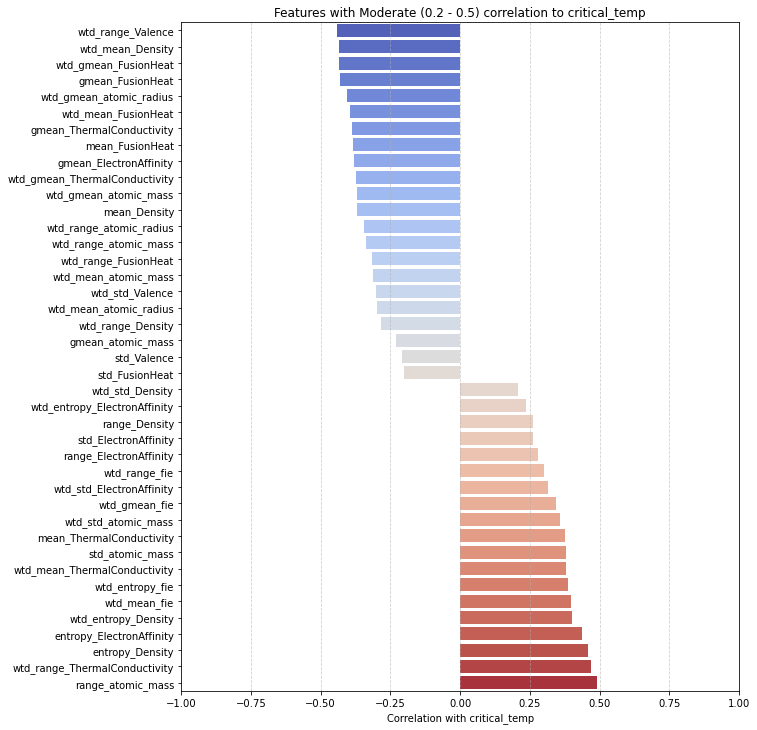

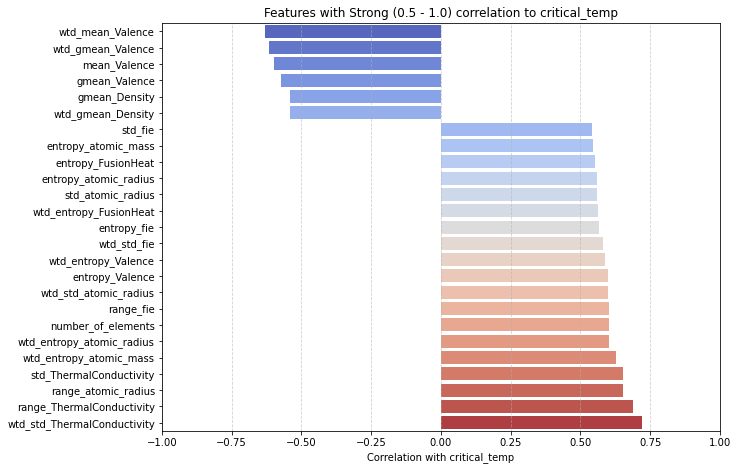

In [25]:
# Correlation with target
corr_with_target = df.corr()['critical_temp'].drop('critical_temp')
abs_corr = corr_with_target.abs()

# Define intervals
intervals = {
    'Weak (0 - 0.2)': (0.0, 0.2),
    'Moderate (0.2 - 0.5)': (0.2, 0.5),
    'Strong (0.5 - 1.0)': (0.5, 1.0)
}

# Plot correlations by interval
for interval_name, (low, high) in intervals.items():
    # Select features within correlation interval
    features_in_interval = corr_with_target[(abs_corr >= low) & (abs_corr < high)].sort_values()
    
    if features_in_interval.empty:
        print(f"No features in {interval_name} correlation interval.")
        continue
    
    plt.figure(figsize=(10, max(4, len(features_in_interval) * 0.3)))
    sns.barplot(x=features_in_interval.values, y=features_in_interval.index, palette='coolwarm')
    plt.xlabel('Correlation with critical_temp')
    plt.title(f'Features with {interval_name} correlation to critical_temp')
    plt.xlim(-1, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

<AxesSubplot:>

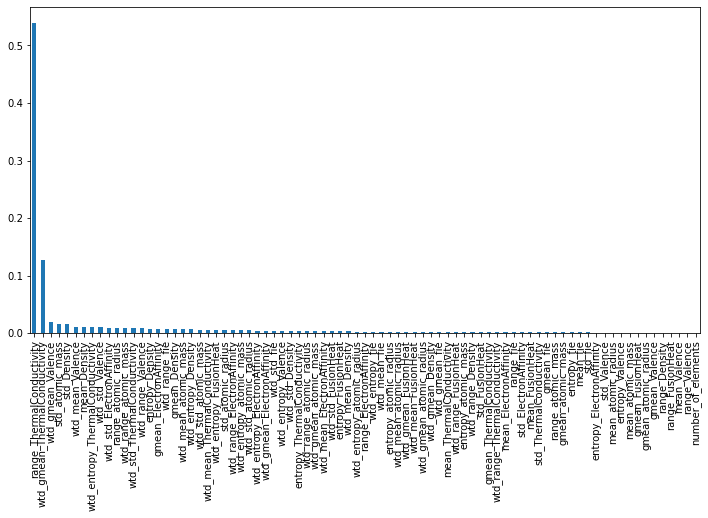

In [35]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.head()
importances.sort_values(ascending=False).plot.bar(figsize=(12, 6))


Original features: 81
Reduced features: 17


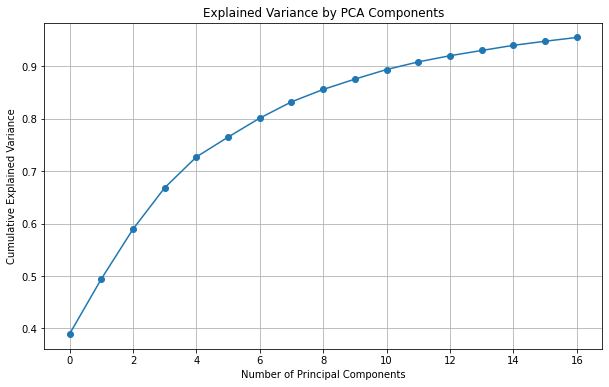

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

# Standardise features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.95)  # Retains 95% variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}")
print(f"Reduced features: {X_pca.shape[1]}")

# Explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [33]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 1. Split features and target
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

# 2. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 3. Get and sort feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# 4. Select top features
top_n = 20  # You can set any number
top_features = importances.head(top_n).index.tolist()

print(f"Top {top_n} features:", top_features)

# 5. Create new feature set
X_selected = X[top_features]


Top 20 features: ['range_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'wtd_gmean_Valence', 'std_atomic_mass', 'std_Density', 'wtd_mean_Valence', 'mean_Density', 'wtd_entropy_ThermalConductivity', 'wtd_std_Valence', 'wtd_std_ElectronAffinity', 'range_atomic_radius', 'wtd_range_atomic_mass', 'wtd_std_ThermalConductivity', 'wtd_range_Valence', 'entropy_Density', 'gmean_ElectronAffinity', 'wtd_range_fie', 'gmean_Density', 'wtd_mean_atomic_mass', 'wtd_entropy_Density']


In [36]:
X_selected['critical_temp'] = y

X_selected


,range_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_gmean_Valence,std_atomic_mass,std_Density,wtd_mean_Valence,mean_Density,wtd_entropy_ThermalConductivity,wtd_std_Valence,wtd_std_ElectronAffinity,...,wtd_range_atomic_mass,wtd_std_ThermalConductivity,wtd_range_Valence,entropy_Density,gmean_ElectronAffinity,wtd_range_fie,gmean_Density,wtd_mean_atomic_mass,wtd_entropy_Density,critical_temp
0,399.97342,0.621979,2.219783,51.968828,3306.162897,2.257143,4654.35725,0.262848,0.437059,42.558396,...,31.794921,138.517163,1.085714,1.033129,60.123179,735.985714,724.953211,57.862692,0.814598,29.00
1,429.97342,0.619735,2.210679,47.094633,3767.403176,2.257143,5821.48580,0.567706,0.468606,41.667621,...,36.161939,139.630922,1.128571,1.314442,69.833315,743.164286,1237.095080,58.518416,0.914802,26.00
2,399.97342,0.619095,2.232679,51.968828,3306.162897,2.271429,4654.35725,0.250477,0.444697,41.639878,...,35.741099,138.540613,1.114286,1.033129,60.123179,743.164286,724.953211,57.885242,0.760305,19.00
3,399.97342,0.620535,2.226222,51.968828,3306.162897,2.264286,4654.35725,0.257045,0.440952,42.102344,...,33.768010,138.528893,1.100000,1.033129,60.123179,739.575000,724.953211,57.873967,0.788889,22.00
4,399.97342,0.624878,2.206963,51.968828,3306.162897,2.242857,4654.35725,0.272820,0.428809,43.452059,...,27.848743,138.493671,1.057143,1.033129,60.123179,728.807143,724.953211,57.840143,0.859811,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,134.00000,95.001493,3.519911,65.764081,2981.637585,3.555556,7341.25000,0.634332,0.496904,55.219027,...,15.504479,46.595943,2.168889,1.284617,49.825259,427.546667,6404.741690,53.095769,1.110551,2.44
21259,399.97342,1.577047,2.038991,69.232655,4506.895480,2.047619,5174.28580,0.745515,0.212959,57.634544,...,7.353333,156.558695,0.904762,1.165065,29.177546,659.771429,962.364248,49.021367,1.080432,122.10
21260,17.00000,57.038314,4.781762,6.756810,1726.500000,4.800000,10296.50000,0.559446,0.400000,12.960000,...,53.041104,6.800000,3.200000,0.679023,69.537903,370.180000,10150.719679,95.609104,0.572700,1.98
21261,17.00000,58.781651,4.665819,6.756810,1726.500000,4.690000,10296.50000,0.659671,0.462493,14.984781,...,31.115202,7.862385,2.210000,0.679023,69.537903,208.799000,10150.719679,97.095602,0.667210,1.84


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming your new dataset is already loaded as X_selected

# 1. Split features and target
X = X_selected.drop('critical_temp', axis=1)
y = X_selected['critical_temp']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define model parameters
n_estimators = 100       # Number of boosting stages (trees)
learning_rate = 0.1      # How much each tree corrects the previous one
max_depth = 3            # Max depth of each tree
random_state = 42        # Random seed for reproducibility

# 4. Create the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    random_state=random_state
)

# 5. Train the model
model.fit(X_train, y_train)

# 6. Predict on test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 162.43
R² Score: 0.86


In [39]:
!pip install xgboost


     |████████████████████████████████| 2.1 MB 3.1 MB/s eta 0:00:01


In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming your new dataset is already loaded as X_selected

# 1. Split features and target
X = X_selected.drop('critical_temp', axis=1)
y = X_selected['critical_temp']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define model parameters
n_estimators = 100         # Number of boosting rounds
learning_rate = 0.1        # Step size shrinkage
max_depth = 3              # Maximum depth of trees
subsample = 0.8            # Row sampling (helps prevent overfitting)
colsample_bytree = 0.8     # Feature sampling per tree
random_state = 42          # Random seed for reproducibility

# 4. Create the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=random_state,
    verbosity=1  # 0 = silent, 1 = warnings, 2 = info
)

# 5. Train the model
model.fit(X_train, y_train)

# 6. Predict on test set
y_pred = model.predict(X_test)

# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 162.12
R² Score: 0.86



Model Parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8}
Mean Squared Error: 162.12
R² Score: 0.86


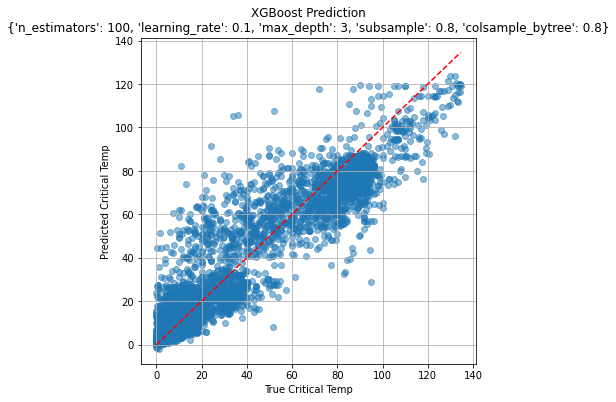


Model Parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9}
Mean Squared Error: 134.82
R² Score: 0.88


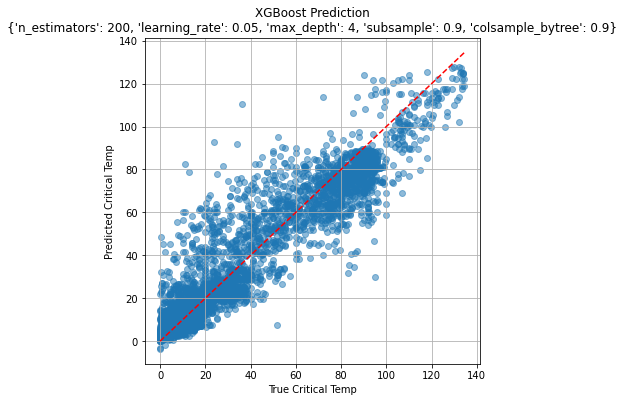


Model Parameters: {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 2, 'subsample': 0.7, 'colsample_bytree': 0.7}
Mean Squared Error: 169.81
R² Score: 0.85


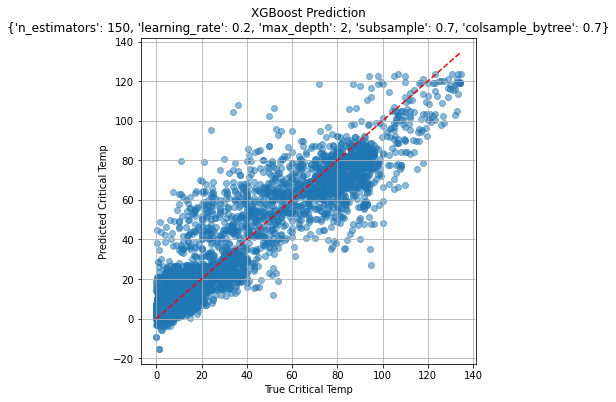

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

def try_xgboost_model(X, y, params):
    # Split train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=params.get('random_state', 42))

    # Create model
    model = xgb.XGBRegressor(
        n_estimators=params.get('n_estimators', 100),
        learning_rate=params.get('learning_rate', 0.1),
        max_depth=params.get('max_depth', 3),
        subsample=params.get('subsample', 0.8),
        colsample_bytree=params.get('colsample_bytree', 0.8),
        random_state=params.get('random_state', 42),
        verbosity=1
    )

    # Fit model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nModel Parameters: {params}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Plot: True vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("True Critical Temp")
    plt.ylabel("Predicted Critical Temp")
    plt.title(f"XGBoost Prediction\n{params}")
    plt.grid(True)
    plt.show()

# --- Usage Example ---

# Data
X = X_selected.drop('critical_temp', axis=1)
y = X_selected['critical_temp']

# Try different parameter sets
param_sets = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.8},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9},
    {'n_estimators': 150, 'learning_rate': 0.2, 'max_depth': 2, 'subsample': 0.7, 'colsample_bytree': 0.7}
]

for params in param_sets:
    try_xgboost_model(X, y, params)



Elastic Net
Mean Squared Error: 438.31
R² Score: 0.62

Decision Tree
Mean Squared Error: 260.93
R² Score: 0.77

Random Forest
Mean Squared Error: 226.78
R² Score: 0.80

Comparison of Models:
           Model         MSE  R2 Score
0    Elastic Net  438.310940  0.619218
1  Decision Tree  260.933883  0.773314
2  Random Forest  226.783828  0.802982


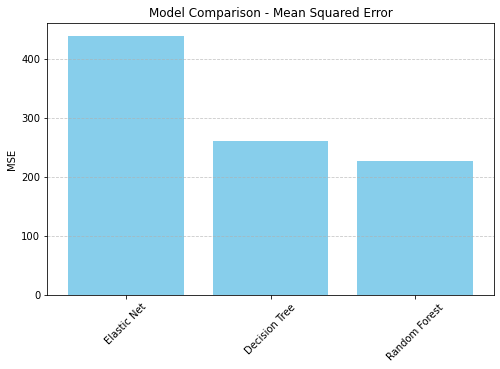

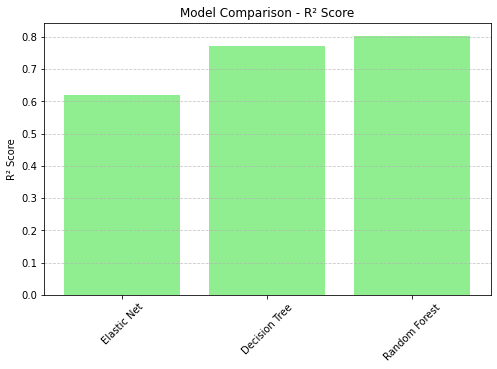

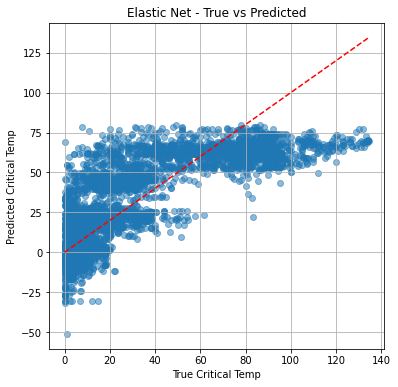

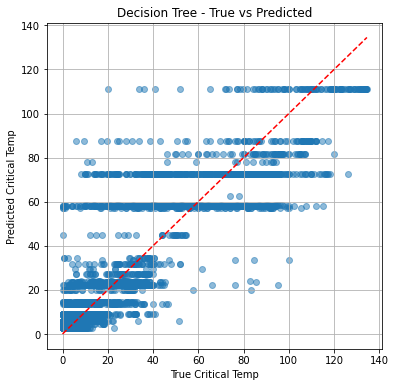

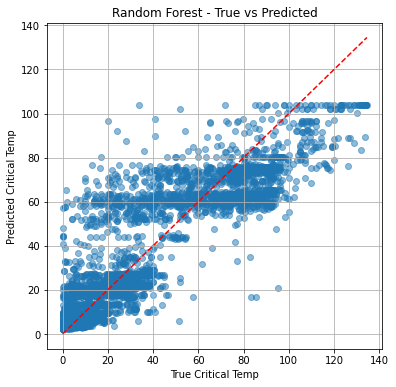

In [43]:
# Import libraries
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Split features and target
X = X_selected.drop('critical_temp', axis=1)
y = X_selected['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create models
models = {
    "Elastic Net": ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# 3. Train, predict, and evaluate each model
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    results.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2
    })
    
    # Save predictions
    predictions[name] = y_pred

# 4. Show results as a table
results_df = pd.DataFrame(results)
print("\nComparison of Models:")
print(results_df)

# --- VISUALS ---

# Bar plot for MSE
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['MSE'], color='skyblue')
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for R² Score
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['R2 Score'], color='lightgreen')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plots: True vs Predicted for each model
for name, y_pred in predictions.items():
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
    plt.title(f'{name} - True vs Predicted')
    plt.xlabel('True Critical Temp')
    plt.ylabel('Predicted Critical Temp')
    plt.grid(True)
    plt.show()
